In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
# loading the data from csv file to pandas dataframe
df = pd.read_csv("Advertising.csv")
# inspecting the first 5 rows of the dataframe
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# checking the number of rows and columns
df.shape

(200, 5)

In [4]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
# checking the number of missing values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Basic Observation:

Avg expense spend is highest on TV

Avg expense spend is lowest on Radio

Max sale is 27 and min is 1.6

In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

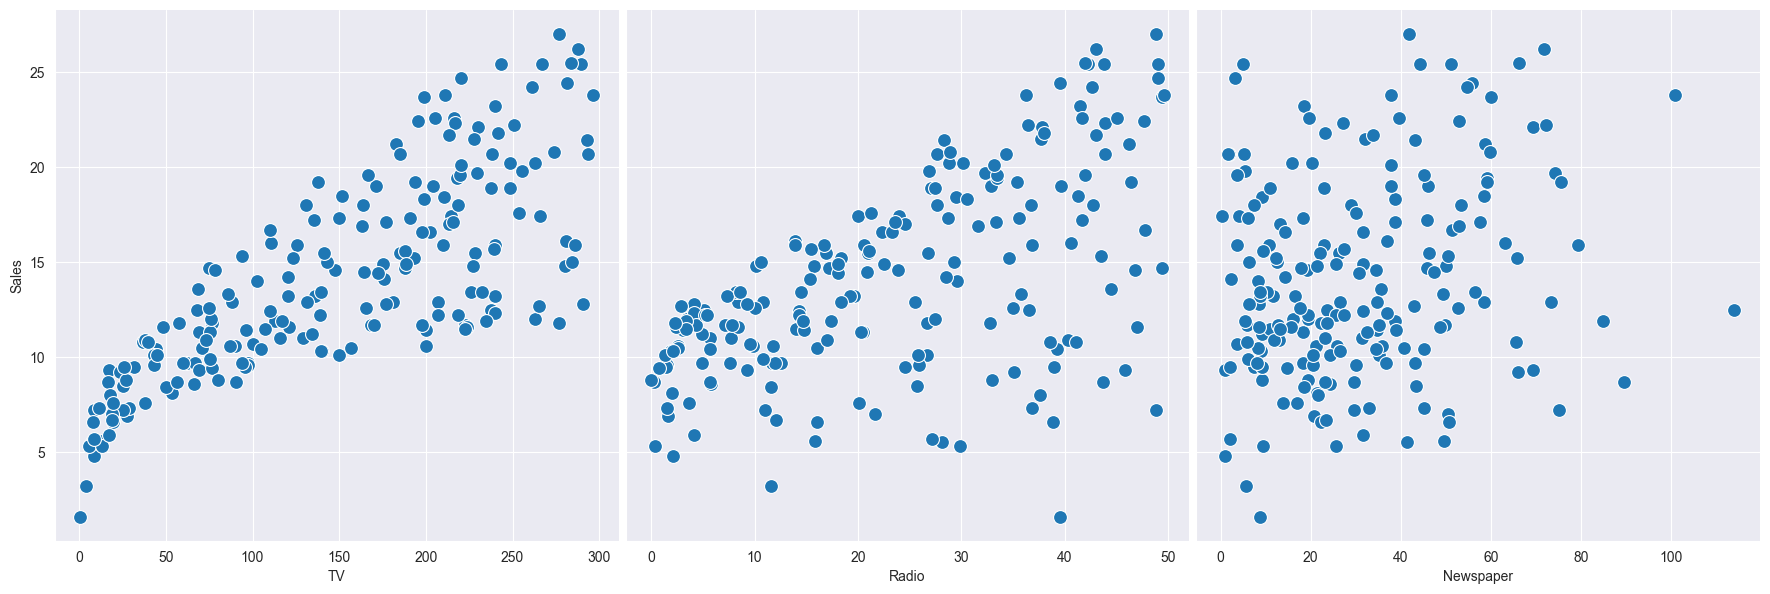

In [9]:
sns.pairplot(df, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', kind='scatter', height=6, plot_kws={'s': 100})
plt.show()


Pair Plot Observation

When advertising cost increases in TV Ads the sales will increase as well. While the for newspaper and radio it is bit unpredictable.

<Axes: ylabel='Frequency'>

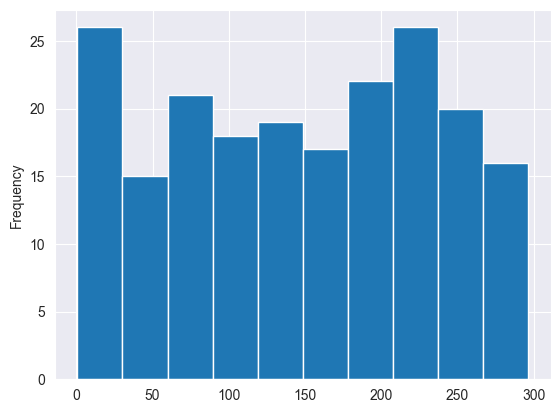

In [10]:
df['TV'].plot.hist(bins=10)

<Axes: xlabel='Radio', ylabel='Frequency'>

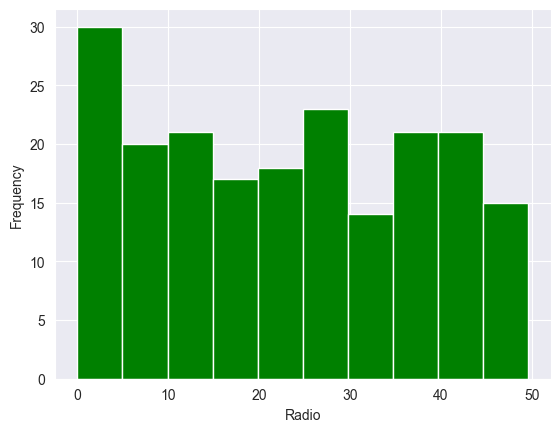

In [11]:
df['Radio'].plot.hist(bins=10, color="green", xlabel="Radio")

<Axes: xlabel='newspaper', ylabel='Frequency'>

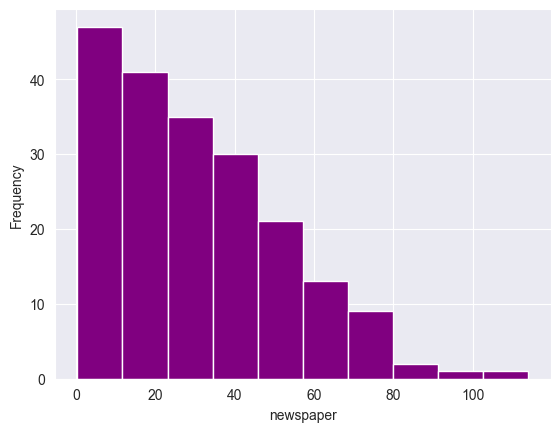

In [12]:
df['Newspaper'].plot.hist(bins=10,color="purple", xlabel="newspaper")

Histogram Observation

The majority sales is the result of low advertising cost in newspaper


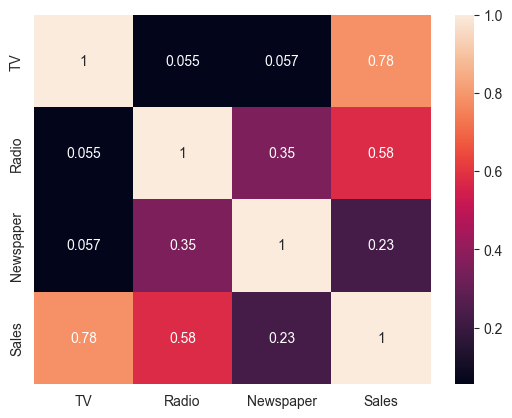

In [13]:
sns.heatmap(df.corr(),annot = True)
plt.show()

SALES IS HIGHLY COORELATED WITH THE TV


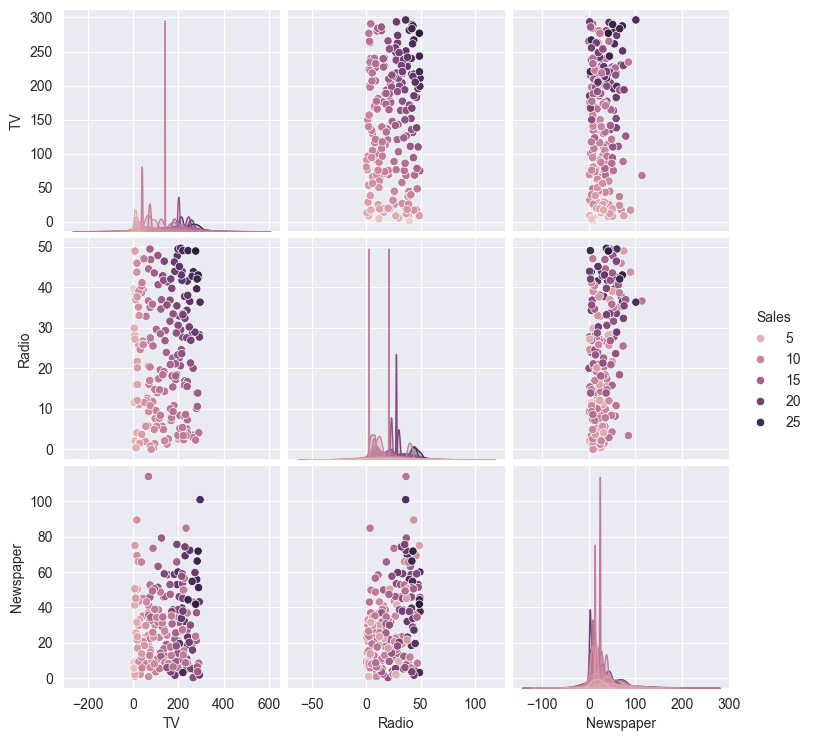

In [14]:
sns.pairplot(df, hue='Sales')

In [15]:
x =df.drop('Sales', axis=1)
y = df['Sales']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=42)


In [17]:
print(X_train)

        TV  Radio  Newspaper
169  284.3   10.6        6.4
97   184.9   21.0       22.0
31   112.9   17.4       38.6
12    23.8   35.1       65.9
35   290.7    4.1        8.5
..     ...    ...        ...
106   25.0   11.0       29.7
14   204.1   32.9       46.0
92   217.7   33.5       59.0
179  165.6   10.0       17.6
102  280.2   10.1       21.4

[140 rows x 3 columns]


In [18]:
print(y_train)

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: Sales, Length: 140, dtype: float64


In [19]:
print(X_test)

        TV  Radio  Newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2
115   75.1   35.0       52.7
69   216.8   43.9       27.2
170   50.0   11.6       18.4
174  222.4    3.4       13.1
45   175.1   22.5       31.5
66    31.5   24.6        2.2
182   56.2    5.7       29.7
165  234.5    3.4       84.8
78     5.4   29.9        9.4
186  139.5    2.1       26.6
177  170.2    7.8       35.2
56     7.3   28.1       41.4
152  197.6   23.3       14.2
82    75.3   20.3       32.5
68   237.4   27.5       11.0
124  229.5   32.3       74.2
16    67.8   36.6      114.0
148   38.0   40.3       11.9
93   250.9   36.5       72.3
65    69.0    9.3        0.9
60    53.5    2.0       21.4
84   213.5   43.0       33.8
67   139.3   14.5       10.2
125   87.2   11.8       25.9
132    8.4   27.2        2.1
9    199.8    2.6       21.2
18    69.2   20.5       18.3
55   198.9   49.4       60.0
75    16.9   4

In [20]:
print(y_test)

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     11.7
Name: Sales, dtype: float64


In [21]:
model = LinearRegression()
model.fit(X_train,y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
print('Accuracy:', model.score(X_train, y_train))

Accuracy: 0.9055159502227753


In [23]:
pred= model.predict(X_test)
print(pred)

[16.5653963  21.18822792 21.55107058 10.88923816 22.20231988 13.35556872
 21.19692502  7.35028523 13.27547079 15.12449511  9.01443026  6.52542825
 14.30205991  8.97026042  9.45679576 12.00454351  8.91549403 16.15619251
 10.29582883 18.72473553 19.76821818 13.77469028 12.49638908 21.53501762
  7.60860741  5.6119801  20.91759483 11.80627665  9.08076637  8.51412012
 12.17604891  9.9691939  21.73008956 12.77770578 18.1011362  20.07590796
 14.26202556 20.93826535 10.83938827  4.38190607  9.51332406 12.40486324
 10.17045434  8.09081363 13.16388427  5.2243552   9.28893833 14.09330719
  8.69024497 11.66119763 15.71848432 11.63156862 13.35360735 11.1531472
  6.33636845  9.76157954  9.4195714  24.25516546  7.69519137 12.15317572]


In [24]:
print("Intercept:", model.intercept_)
print("\nCoefficients:")
for feature, coef in zip(x.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
    print(f"Mean impact on Sales = {coef:.4f} * {x[feature].mean():.4f} = {coef * x[feature].mean():.4f}")


Intercept: 2.7089490925159065

Coefficients:
TV: 0.0441
Mean impact on Sales = 0.0441 * 147.0425 = 6.4786
Radio: 0.1993
Mean impact on Sales = 0.1993 * 23.2640 = 4.6362
Newspaper: 0.0069
Mean impact on Sales = 0.0069 * 30.5540 = 0.2103


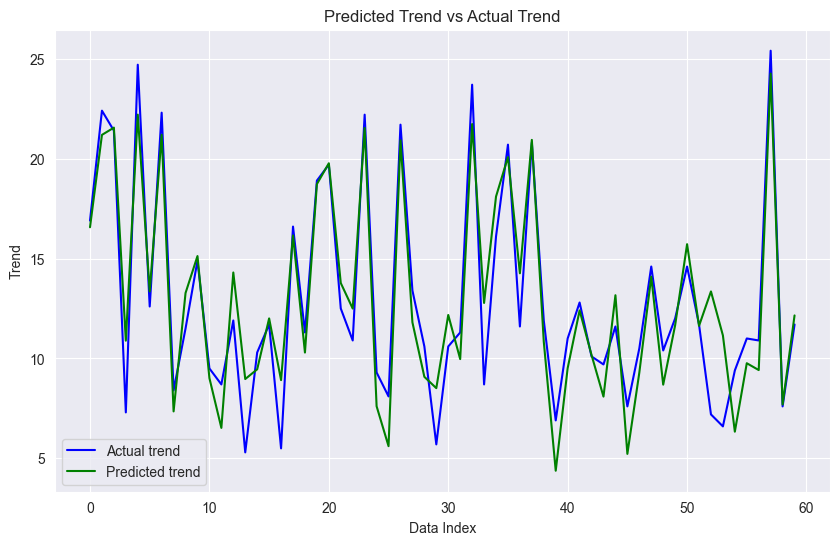

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, color='blue', label='Actual trend')
plt.plot(np.arange(len(y_test)), pred, color='green', label='Predicted trend')
plt.xlabel('Data Index')
plt.ylabel('Trend')
plt.title('Predicted Trend vs Actual Trend')
plt.legend()
plt.show()


<module 'matplotlib.pyplot' from 'E:\\JupyterProject\\CodeAlpha\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

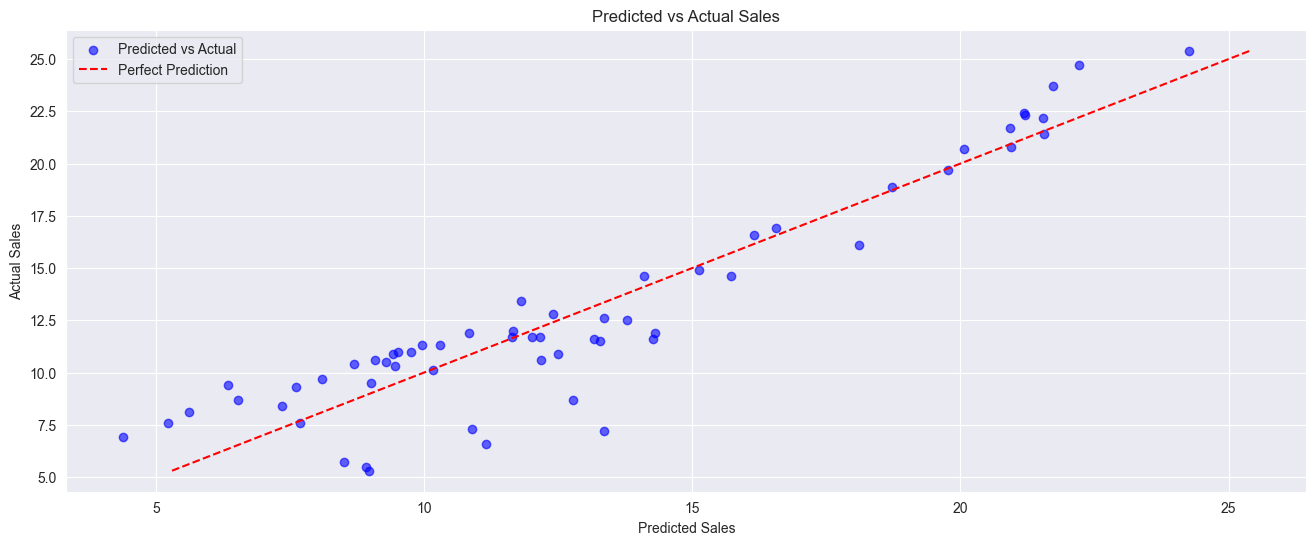

In [26]:
plt.figure(figsize=(16,6))
plt.scatter(pred, y_test, alpha=0.6, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--',label="Perfect Prediction")
plt.xlabel('Predicted Sales')
plt.ylabel('Actual Sales')
plt.title('Predicted vs Actual Sales')
plt.legend()
plt


This plot shows:
- Actual vs Predicted sales comparison
- The red dashed line represents perfect predictions (where actual = predicted)
- Points closer to the line indicate better predictions
- Scattered points show how well our model performs across different sales values

In [27]:
analysis= pd.DataFrame({'Actual': y_test, 'Predicted': pred})
analysis.head(10)

,Actual,Predicted
95,16.9,16.565396
15,22.4,21.188228
30,21.4,21.551071
158,7.3,10.889238
128,24.7,22.202320
115,12.6,13.355569
69,22.3,21.196925
170,8.4,7.350285
174,11.5,13.275471
45,14.9,15.124495


In [28]:


print("R2 Score:", r2_score(y_test, pred))
print("Mean Squared Error:", mean_squared_error(y_test, pred))
print("Cross Validation R2 Scores:", cross_val_score(model, x, y, cv=5, scoring='r2'))
print("Mean Cross Validation R2:", cross_val_score(model, x, y, cv=5, scoring='r2').mean())


R2 Score: 0.8609466508230368
Mean Squared Error: 3.79679723671522
Cross Validation R2 Scores: [0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]
Mean Cross Validation R2: 0.8871063495438436
